<div class="alert alert-block alert-warning">
<font size="5">
<b>Important Notes</b></font><br>
<br>
<font size="4">
<ul>
  <li>File names should follow the format: HWX_StudentID_Name, where X is the assignment number.</li>
    <br>
  <li>Please upload it to NTHU eeclass and be awared of the deadline.</li>
    <br>
  <li>Late submissions are generally not accepted, and a late submission will result in a score of 0. If there are any special circumstances, please contact the instructor for clarification.</li>
    <br>
  <li>Plagiarism is strictly prohibited (whether copying from others, the internet, or books). If any references are used, they must be properly cited. Both the plagiarizer and the source of the plagiarism will receive a score of 0. Allowing someone else to copy your assignment is not helping but harming them.</li>
    <br>
  <li>Code should be written in the "Python Cell" below the question, with comments if needed. If responses to questions and interpretations of results are needed, they should be written in the "Markdown Cell" below the Python cell.</li>
</ul>
</font>
</div>

# 1. (55%) Reaction Gibbs free energy and equilibrium constants
The file "Q1_data.csv" contains gas-phase thermodynamic data on several compounds. The comma-separated columns are: chemical formula, InChIKey, standard molar enthalpy of formation ($\Delta_{f}H^⊖_m$, in $kJ mol^{-1}$ at 298 K), standard molar entropy ($S^⊖_m$, in $J K^{-1} mol^{-1}$ at 298 K) and the coefficients, $A, B, ..., H$ for the temperature dependence of $\Delta_{f}H^⊖_m, S^⊖_m$ and the standard molar heat capacity, $C^⊖_{p, m}$, according to the following *Schomate equations*:  
$$C^⊖_{p, m} = A + Bt + Ct^2 + Dt^3 + {E \over t^2}$$
$$\Delta_{f}H^⊖_m = \Delta_{f}H^⊖_m(298K) + At + { Bt^2 \over 2} + { Ct^3 \over 3} + { Dt^4 \over 4} - {E \over t} + F - H $$
$$S^⊖_m = A \ln{t} + Bt + { Ct^2 \over 2} + { Dt^3 \over 3} - {E \over 2t^2} + G$$


where $ t = T/1000$ and $T$ in Kelvin scale.  
In the following questions, you are asked to use this tabulated data to calculate equilibrium constants for specified equations.

(a) (5%) Please use pandas to read the file "Q1_data.csv", ignoring lines that start with # as they are considered comments, and then store the data into a DataFrame named df. Showing df will yield the expected output:

<p align="center">
    <img src="https://i.imgur.com/etMNTwv.png" width=1000>
</p>

In [44]:
import pandas as pd
df = pd.read_csv('Q1_data.csv', comment='#')
df.style.hide()

formula,InChIKey,DfHo_298,So_298,A,B,C,D,E,F,G,H
CH4,VNWKTOKETHGBQD-UHFFFAOYSA-N,-74.870000,188.660000,-0.703029,108.477300,-42.521570,5.862788,0.678565,-76.843760,158.716300,-74.873100
CO,UGFAIRIUMAVXCW-UHFFFAOYSA-N,-110.530000,197.660000,25.567590,6.096130,4.054656,-2.671301,0.131021,-118.008900,227.366500,-110.527100
H2O,XLYOFNOQVPJJNP-UHFFFAOYSA-N,-241.830000,188.840000,30.092000,6.832514,6.793435,-2.534480,0.082139,-250.881000,223.396700,-241.826400
H2,UFHFLCQGNIYNRP-UHFFFAOYSA-N,0.000000,130.680000,33.066178,-11.363417,11.432816,-2.772874,-0.158558,-9.980797,172.707974,0.000000
CO2,CURLTUGMZLYLDI-UHFFFAOYSA-N,-393.510000,213.785000,24.997350,55.186960,-33.691370,7.948387,-0.136638,-403.607500,228.243100,-393.522400
O2,MYMOFIZGZYHOMD-UHFFFAOYSA-N,0.000000,205.152000,30.032350,8.772972,-3.988133,0.788313,-0.741599,-11.324680,236.166300,0.000000


(b) (5%) Please define a function get_DfH(df, formula, T) that:
- It takes the dataframe df, molecular formula (like 'CH4', 'CO', and etc) and temperature $T$ as input arguments.
- It returns the standard molar enthalpy ($\Delta_{f}H^⊖_m$) of formation at the input $T$.
- The $\Delta_{f}H^⊖_m$ shall be calculated using the equation shown above.
- The parameters (A, B, C, ..., H) shall be extracted using df defined in (a). You shall not define these parameters explicitly in your function.

In [64]:
import pandas as pd

df = pd.read_csv('Q1_data.csv', comment='#')
df.columns = df.columns.str.strip() # 移除前面空格

def get_DfH(df, formula, T):
    t = T / 1000
    row = df[df['formula'] == formula]
    DfH_298 = row['DfHo_298'].values[0]
    A, B, C, D, E, F, H = row['A'].values[0], row['B'].values[0], row['C'].values[0], row['D'].values[0], row['E'].values[0], row['F'].values[0], row['H'].values[0]
    DfH_T = DfH_298 + (A * t) + (B * t**2 / 2) + (C * t**3 / 3) + (D * t**4 / 4) - (E / t) + F - H
    return DfH_T

# Test
get_DfH(df, 'CH4', 298) # -74.87 KJ/mol

-74.87414977867616

(c) (5%) Similar to question (b), please define a function get_S(df, formula, T) that:
- It takes the dataframe df, molecular formula (like 'CH4', 'CO', and etc) and temperature $T$ as input arguments.
- It returns the standard molar entropy ($S^⊖_m$) of formation at the input $T$.
- The $S^⊖_m$ shall be calculated using the equation shown above.
- The parameters (A, B, C, ..., H) shall be extracted using df defined in (a). You shall not define these parameters explicitly in your function.

In [47]:
import pandas as pd
import numpy as np

df = pd.read_csv('Q1_data.csv', comment='#')
df.columns = df.columns.str.strip() # 移除前面空格

def get_S(df, formula, T):
    t = T / 1000
    row = df[df['formula'] == formula]
    A, B, C, D, E, G = row['A'].values[0], row['B'].values[0], row['C'].values[0], row['D'].values[0], row['E'].values[0], row['G'].values[0]
    S_T = A * np.log(t) + B * t + (C * t**2 / 2) + (D * t**3 / 3) - (E / (2 * t**2)) + G
    return S_T

# Test
get_S(df, 'CO', 298) # 197.66 J/mol K

197.64821553751102

(d) (20%) Let's now consider the *water-gas shift reaction*, which can be used to produce hydrogen gas:
$${\rm CO(g)+H_{2}O(g) ⇋ H_{2}(g) + CO_{2}(g)}$$   


where the correponding reaction quantities can be calculated as follows:   


$\Delta_{r}H^⊖_m = \Delta_{f}H^⊖_m({\rm H_{2}(g)}) + \Delta_{f}H^⊖_m({\rm CO_{2}(g)}) - \Delta_{f}H^⊖_m({\rm CO(g)}) - \Delta_{f}H^⊖_m({\rm H_{2}O(g)})$

$\Delta_{r}S^⊖_m = S^⊖_m({\rm H_{2}(g)}) + S^⊖_m({\rm CO_{2}(g)}) - S^⊖_m({\rm CO(g)}) - S^⊖_m({\rm H_{2}O(g)})$

$\Delta_{r}G^⊖_m = \Delta_{r}H^⊖_m - T\Delta_{r}S^⊖_m $

$ K = {\rm exp}({ -\Delta_{r}G^⊖_m \over RT })$

Using the equations defined above, please define a function get_K(df, species, T) that:
- It takes the dataframe df, species and temperature $T$ as input arguments.
- Species is a list of tuple defining the molecular formula and the stoichiometric numbers, e.g. [(-1, 'CO'), (-1, 'H2O'), (1,'H2'), (1, 'CO2')]
- It returns the $\Delta_{r}G^⊖_m$ and equilibrium constant $K$ calculated at the input $T$.
- The $\Delta_{r}G^⊖_m$ and $K$ shall be calculated using the equation shown above.
- The $\Delta_{f}H^⊖_m$ and $S^⊖_m$ of each formula shall be obtained using the get_DfH and get_S defined in (b) and (c).
- It shall be general, i.e. not limited to the reaction shown above only. For example, for reaction:  


$$\rm {CH_{4}(g)+2O_{2}(g) ⇋ CO_{2}(g) + 2H_{2}O(g)}$$   

where data of all molecules present in the reaction are included in data.csv. Your code shall be able to output $K$ for this reaction as well. 

Finally, print the $\Delta_{r}G^⊖_m$ and $K$ (to the 2 decimal places) of the *water-gas shift reaction*  at 850 K with proper unit. 

In [87]:
import pandas as pd
import numpy as np

df = pd.read_csv('Q1_data.csv', comment='#')
df.columns = df.columns.str.strip()

# Return standard formation enthalpy
def get_DfH(df, formula, T):
    t = T / 1000
    row = df[df['formula'] == formula]
    DfH_298 = row['DfHo_298'].values[0]
    A, B, C, D, E, F, H = row['A'].values[0], row['B'].values[0], row['C'].values[0], row['D'].values[0], row['E'].values[0], row['F'].values[0], row['H'].values[0]
    DfH_T = DfH_298 + (A * t) + (B * t**2 / 2) + (C * t**3 / 3) + (D * t**4 / 4) - (E / t) + F - H
    return DfH_T

# Calculate entropy at temperature T
def get_S(df, formula, T):
    t = T / 1000
    row = df[df['formula'] == formula]
    A, B, C, D, E, G = row['A'].values[0], row['B'].values[0], row['C'].values[0], row['D'].values[0], row['E'].values[0], row['G'].values[0]
    S_T = A * np.log(t) + B * t + (C * t**2 / 2) + (D * t**3 / 3) - (E / (2 * t**2)) + G
    return S_T

# Gibbs free energy change and equilibrium constant at T
def get_K(df, species, T):
    R = 8.314 / 1000  # KJ/(mol*K)
    delta_r_H = sum(s[0] * get_DfH(df, s[1], T) for s in species)
    delta_r_S = sum(s[0] * get_S(df, s[1], T) for s in species)
    delta_r_G = delta_r_H - T * delta_r_S / 1000
    K = np.exp(-delta_r_G / (R * T))
    return delta_r_G, K

# Define species for water-gas shift reaction
species = [(-1, 'CO'), (-1, 'H2O'), (1, 'H2'), (1, 'CO2')]
delta_r_G, K = get_K(df, species, 850) 

# Results rounded to two decimal places
delta_r_G = round(delta_r_G, 2)
K = round(K, 2)

print(f"ΔrG°m = {delta_r_G} kJ/mol, K = {K}")


ΔrG°m = -7.89 kJ/mol, K = 3.05


(e) (20%) While increasing $T$ increases the production rate of hydrogen, the *water-gas shift reaction* becomes less favorable thermodynamically. In this question, you are asked to consider $\Delta_{r}G^⊖_m$ at the temperature range (200, 1600) K:
- Estimate at which $T$ the $\Delta_{r}G^⊖_m$ is roughly 0 and print the value out (as an integer). 
- Plot $\Delta_{r}G^⊖_m$ at the temperature range (200, 1600) K, a horizontal line ($\Delta_{r}G^⊖_m$ = 0), and your estimate as scatter point in the same figure. This could help you to double-check your estimation visually.
- The figure should be properly set up and labelled as we practiced in the class. 

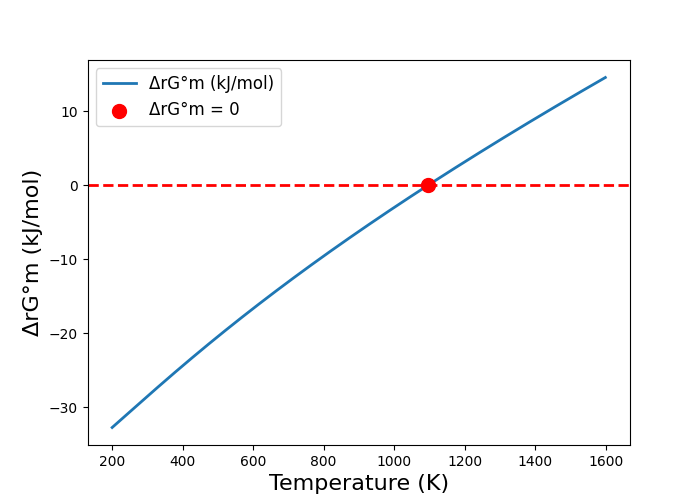

ΔrG°m is 0 when T = 1096 (K)


In [1]:
%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Q1_data.csv', comment='#')
df.columns = df.columns.str.strip()

# Return standard formation enthalpy
def get_DfH(df, formula, T):
    t = T / 1000
    row = df[df['formula'] == formula]
    DfH_298 = row['DfHo_298'].values[0]
    A, B, C, D, E, F, H = row['A'].values[0], row['B'].values[0], row['C'].values[0], row['D'].values[0], row['E'].values[0], row['F'].values[0], row['H'].values[0]
    DfH_T = DfH_298 + (A * t) + (B * t**2 / 2) + (C * t**3 / 3) + (D * t**4 / 4) - (E / t) + F - H
    return DfH_T

# Calculate entropy at temperature T
def get_S(df, formula, T):
    t = T / 1000
    row = df[df['formula'] == formula]
    A, B, C, D, E, G = row['A'].values[0], row['B'].values[0], row['C'].values[0], row['D'].values[0], row['E'].values[0], row['G'].values[0]
    S_T = A * np.log(t) + B * t + (C * t**2 / 2) + (D * t**3 / 3) - (E / (2 * t**2)) + G
    return S_T

# Gibbs free energy change and equilibrium constant at T
def get_K(df, species, T):
    R = 8.314 / 1000  # KJ/(mol*K)
    delta_r_H = sum(s[0] * get_DfH(df, s[1], T) for s in species)
    delta_r_S = sum(s[0] * get_S(df, s[1], T) for s in species)
    delta_r_G = delta_r_H - T * delta_r_S / 1000
    K = np.exp(-delta_r_G / (R * T))
    return delta_r_G, K

species = [(-1, 'CO'), (-1, 'H2O'), (1, 'H2'), (1, 'CO2')]
temp = np.arange(200, 1600)

delta_r_G_values = []
for T in temp:
    R = 8.314 / 1000  # KJ/(mol*K)
    delta_r_H = sum(s[0] * get_DfH(df, s[1], T) for s in species)
    delta_r_S = sum(s[0] * get_S(df, s[1], T) for s in species)
    delta_r_G = delta_r_H - T * delta_r_S / 1000
    delta_r_G_values.append(delta_r_G)

# Determine the temperature where ΔG°m is roughly zero
delta_r_G_array = np.array(delta_r_G_values)
zero_crossing_T = temp[np.argmin(np.abs(delta_r_G_array))]

# Plotting
plt.figure(figsize=(7, 5))
plt.axhline(0, color='red', linewidth=2, linestyle='--')
plt.plot(temp, delta_r_G_values, label='ΔrG°m (kJ/mol)', linewidth=2)

# Find the zero crossing point
zero = np.argmin(np.abs(np.array(delta_r_G_values)))
plt.scatter(temp[zero], delta_r_G_values[zero], color='red', s = 100, label='ΔrG°m = 0', zorder=3) 

plt.xlabel('Temperature (K)', fontsize=16)
plt.ylabel('ΔrG°m (kJ/mol)', fontsize=16)
plt.legend(fontsize=12)
plt.show()

print(f'ΔrG°m is 0 when T = {temp[zero]} (K)')

# 2.  (25%) Arrhenius equation
The Arrhenius equation is a fundamental concept in physical chemistry that describes the temperature dependence of reaction rates. It was formulated by Swedish scientist Svante Arrhenius in 1889. The equation is typically used to quantify how the rate constant of a chemical reaction changes with temperature.

$$k = A\exp(-{E_{a} \over RT})$$

- $k$ is the rate constant of the reaction,
- $A$ is the pre-exponential factor or frequency factor, which represents the likelihood of molecular collisions leading to a reaction
- $E_{a}$ is the activation energy of the reaction, which is the minimum energy required for a reaction to occur
- $R$ is the gas constant and $T$ is the temperature in Kelvin scale

In this question, you are asked to investigate the kinetics of the isomerization reaction of cyclopropane to propene. The rate constants for this reaction measured at different $T$ are shown in the table below:

<center>

| T (K) | k (s<sup>-1</sup>)     |
|-------|------------------------|
| 700   | 1.5x10 <sup> -5 </sup> |
| 750   | 4.9x10 <sup> -4 </sup> |
| 800   | 5.9x10 <sup> -3 </sup> |
| 850   | 4.7x10 <sup> -2 </sup> |
| 900   | 5.5x10 <sup> -1 </sup> |

</center>


(a) (5%) Please determine $A$ and $E_{a}$ using curve_fit.
- Take natural log for both sides of Arrhenius equation.
- Perform linear fitting to obtain the parameters.
- Print $A$ (scientific notation to the 2 decimal places) and  $E_{a}$ (as integer) with proper units.

In [101]:
import numpy as np
from scipy.optimize import curve_fit

T = np.array([700, 750, 800, 850, 900])  # K
k = np.array([1.5e-5, 4.9e-4, 5.9e-3, 4.7e-2, 5.5e-1])  # s^-1

# Linear fitting
x = 1 / T 
y = np.log(k)  

def linear_fit(x, m, b):
    return m * x + b

# Curve fitting to find m and b
popt, pcov = curve_fit(linear_fit, x, y)

m, b = popt  # m = -Ea/R, b = ln(A)
R = 8.314 

Ea = -m * R 
A = np.exp(b)  

print(f"Ea = {Ea:.2f} J/mol, A = {A:.2e}")


Ea = 268832.98 J/mol, A = 2.01e+15


(b) (20%) Make a $\ln(k)$-$1/T$ plot.
- Plot the data using scatter points.
- Plot the fitted line using plot.
- Plot the 95% CI following the procedure we derived in class.
- The figure should be properly set up and labelled as we practiced in the class.

You shall get something like:
<p align="center">
    <img src="https://i.imgur.com/27lXJEX.png" width=600>
</p>

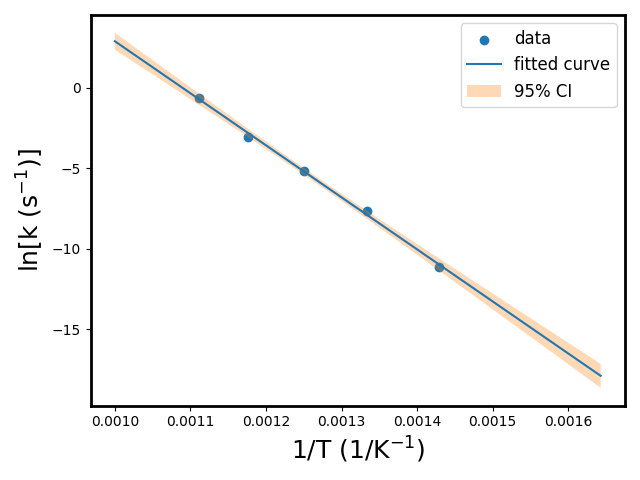

In [32]:
%matplotlib widget
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

T = np.array([700, 750, 800, 850, 900])  # K
k = np.array([1.5e-5, 4.9e-4, 5.9e-3, 4.7e-2, 5.5e-1])  # s^-1

# Linear fitting
x_data = 1 / T 
y_data = np.log(k)  

def linear_fit(x, m, b):
    return m * x + b

# Perform curve fitting to find m and b
popt, pcov = curve_fit(linear_fit, x_data, y_data)

# Define a function to calculate the fit line
def func(x, *params):
    return linear_fit(x, *params)

# Plot the Figure
fig, ax = plt.subplots()
ax.scatter(x_data, y_data, label='data')
#ax.plot(x_data, func(x_data, *popt), label='fitted curve')

x_ext = np.linspace(min(x_data) * 0.9, max(x_data) * 1.15, 400)
y_fitted = func(x_ext, *popt)

# Plot the extended fitted line
ax.plot(x_ext, y_fitted, label='fitted curve')

# Calculate the uncertainty in y
x = np.linspace(min(x_ext), max(x_ext), 100)
var_y = (x**2 * pcov[0][0]) + pcov[1][1] + (2 * x * pcov[0][1])
sig_y = np.sqrt(var_y)

# Plot the 95% confidence interval
ax.fill_between(x, func(x, *popt)-2*sig_y, func(x, *popt)+2*sig_y, alpha=0.3, label='95% CI')

ax.set_xlabel(r'1/T (1/K$^{-1}$)', fontsize=18)
ax.set_ylabel(r'ln[k (s$^{-1}$)]', fontsize=18)

ax = plt.gca()
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.legend(fontsize = 12)
fig.tight_layout()
plt.show()


# 3. (20%) Constrained minimization
Find the minimum of the following function with the following constraints:
$$f(x,y) = (x^2+y^2-1)^3 - x^2y^3$$
Constraints:
- $x-y \ge -1$
- $2x+y \le -1$

(a) (10%) Please plot $f(x,y)$ and the two linear constraints. The requirement is:
- Labels of x, y need to be set, fontsize=16
- Colormap should be 'Reds_r'
- The range of x and y axes are both limited to [-2,2]
- The levels set to be 20 in contourf
- For the two linear constraints:
    - Line plot
    - White dashed line
 
You shall get something like this:

<img src="https://i.imgur.com/Uj8163C.png" width=500>

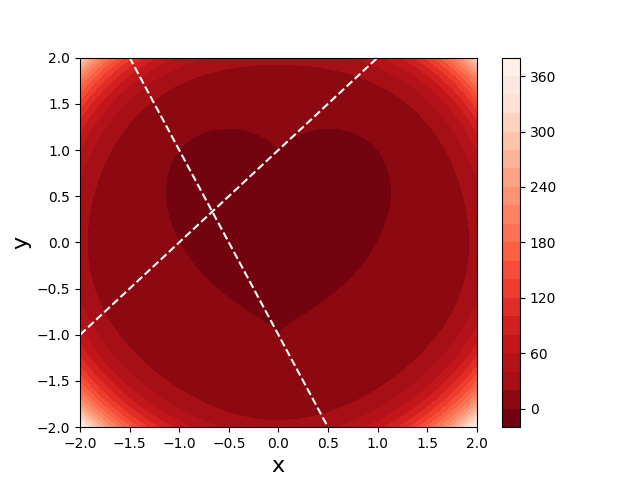

In [34]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return (x**2 + y**2 - 1)**3 - x**2 * y**3

# Create a grid of points
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot the function
fig, ax = plt.subplots()
contour = ax.contourf(X, Y, Z, levels=20, cmap='Reds_r')

# Add the constraint lines
ax.plot(x, x + 1, 'w--', label=r'$x - y \geq -1$')  # x - y >= -1
ax.plot(x, -2*x - 1, 'w--', label=r'$2x + y \leq -1$')  # 2x + y <= -1

ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

fig.colorbar(contour)

plt.show()

(b) (10%) Find and print the minimum of the function with the two constraints. Check with several initial values and plot it on the figure of (a). You shall get something like this for the plot:

<img src="https://i.imgur.com/9OqT60I.png" width=500>

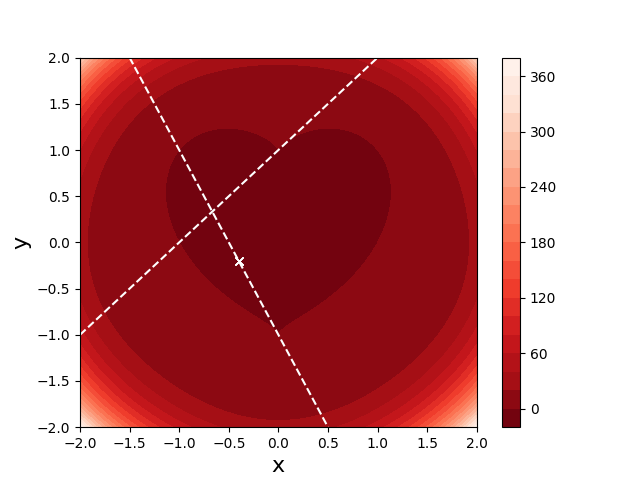

In [38]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def f(x, y):
    return (x**2 + y**2 - 1)**3 - x**2 * y**3

def obj(X):
    x, y = X
    return f(x, y)

def cons1(X):
    x, y = X
    return x - y + 1

def cons2(X):
    x, y = X
    return -2*x - y - 1

cons = [{'type': 'ineq', 'fun': cons1},
               {'type': 'ineq', 'fun': cons2}]

# Plotting the function
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig, ax = plt.subplots()
contour = ax.contourf(X, Y, Z, levels=20, cmap='Reds_r')
fig.colorbar(contour)

# Constraint lines
constraints_list = [(x, x + 1), (x, -2*x - 1)]
for constraint in constraints_list:
    ax.plot(*constraint, 'w--')

# Plot the minimum of the function with constraints
initial_guesses = [(-1.5, -1.5), (0, -2), (1.5, 1.5), (-1, 1)]
for x0 in initial_guesses:
    result = minimize(obj, x0, method='SLSQP', constraints=cons)
    ax.plot(result.x[0], result.x[1], 'wx')

# Set labels and limits
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

plt.show()
